# Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.0 MB/s eta 0:00:00


In [3]:
!pip install imageio

In [4]:
import os
from os import path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pydicom
import imageio
from PIL import Image
from __future__ import print_function, division

from tqdm.auto import tqdm
import logging

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.utils.data as data
import scipy.fftpack

(512, 512)


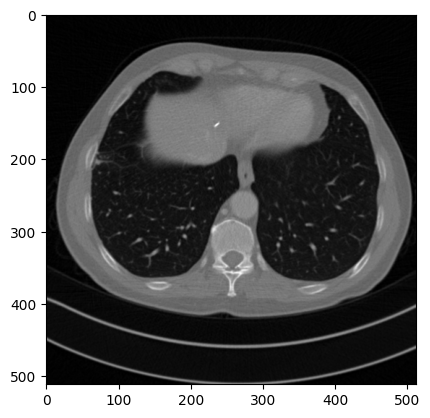

In [5]:
import os
import pydicom
import matplotlib.pyplot as plt

# set the path to the folder containing the .IMA files
folder_path = 'drive/MyDrive/CNCL-Project/Dataset/QD/L067/quarter_3mm'

# find the first .IMA file in the folder
file_name = None
for name in os.listdir(folder_path):
    if name.endswith('.IMA'):
        file_name = name
        break

# read in the first .IMA file and display it using matplotlib
if file_name is not None:
    file_path = os.path.join(folder_path, file_name)
    dicom_image = pydicom.dcmread(file_path)
    print(dicom_image.pixel_array.shape)
    plt.imshow(dicom_image.pixel_array, cmap='gray')
    plt.show()

# Converting .IMA to PNG

QD to PNG

In [12]:
# set the path to the folder containing the .IMA files
folder_path = 'drive/MyDrive/CNCL-Project/Dataset/QD/L067/quarter_3mm'

# create a new folder to store the extracted images
output_folder = 'drive/MyDrive/CNCL-Project/Dataset/QD/Images'
os.makedirs(output_folder, exist_ok=True)

# iterate over all of the .IMA files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".IMA"):
        # read in the DICOM file
        file_path = os.path.join(folder_path, file_name)
        dicom_image = pydicom.dcmread(file_path)

        # extract the pixel data as a numpy array
        pixel_array = dicom_image.pixel_array

        # convert the pixel data to uint8
        pixel_array = (pixel_array / np.max(pixel_array) * 255).astype(np.uint8)

        # set the file name for this image
        file_name = os.path.splitext(file_name)[0] + '.png'

        # set the output file path
        output_path = os.path.join(output_folder, file_name)

        # save the image as a grayscale PNG file
        imageio.imwrite(output_path, pixel_array)

FD to PNG

In [11]:
# set the path to the folder containing the .IMA files
folder_path = 'drive/MyDrive/CNCL-Project/Dataset/FD/L067/full_3mm'

# create a new folder to store the extracted images
output_folder = 'drive/MyDrive/CNCL-Project/Dataset/FD/Images'
os.makedirs(output_folder, exist_ok=True)

# iterate over all of the .IMA files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".IMA"):
        # read in the DICOM file
        file_path = os.path.join(folder_path, file_name)
        dicom_image = pydicom.dcmread(file_path)

        # extract the pixel data as a numpy array
        pixel_array = dicom_image.pixel_array

        # convert the pixel data to uint8
        pixel_array = (pixel_array / np.max(pixel_array) * 255).astype(np.uint8)

        # set the file name for this image
        file_name = os.path.splitext(file_name)[0] + '.png'

        # set the output file path
        output_path = os.path.join(output_folder, file_name)

        # save the image as a grayscale PNG file
        imageio.imwrite(output_path, pixel_array)

In [13]:
QD_images = os.listdir("drive/MyDrive/CNCL-Project/Dataset/QD/Images")
FD_images = os.listdir("drive/MyDrive/CNCL-Project/Dataset/FD/Images")

print(f"Number of files in QD_images directory: {len(QD_images)}")
print(f"Number of files in FD_images directory: {len(FD_images)}")

Number of files in QD_images directory: 224
Number of files in FD_images directory: 224


In [14]:
# set the paths to the full dose and quarter dose image folders
fd_folder_path = 'drive/MyDrive/CNCL-Project/Dataset/FD/Images'
qd_folder_path = 'drive/MyDrive/CNCL-Project/Dataset/QD/Images'

# get a list of the file names in each folder and sort them
fd_file_names = sorted(os.listdir(fd_folder_path))
qd_file_names = sorted(os.listdir(qd_folder_path))

# read in the full dose images and store them in an array
fd_images = []
for fd_name in fd_file_names:
    fd_image = Image.open(os.path.join(fd_folder_path, fd_name)).convert('L')
    fd_images.append(np.array(fd_image))
fd_images = np.array(fd_images)

# read in the quarter dose images and store them in an array
qd_images = []
for qd_name in qd_file_names:
    qd_image = Image.open(os.path.join(qd_folder_path, qd_name)).convert('L')
    qd_images.append(np.array(qd_image))
qd_images = np.array(qd_images)

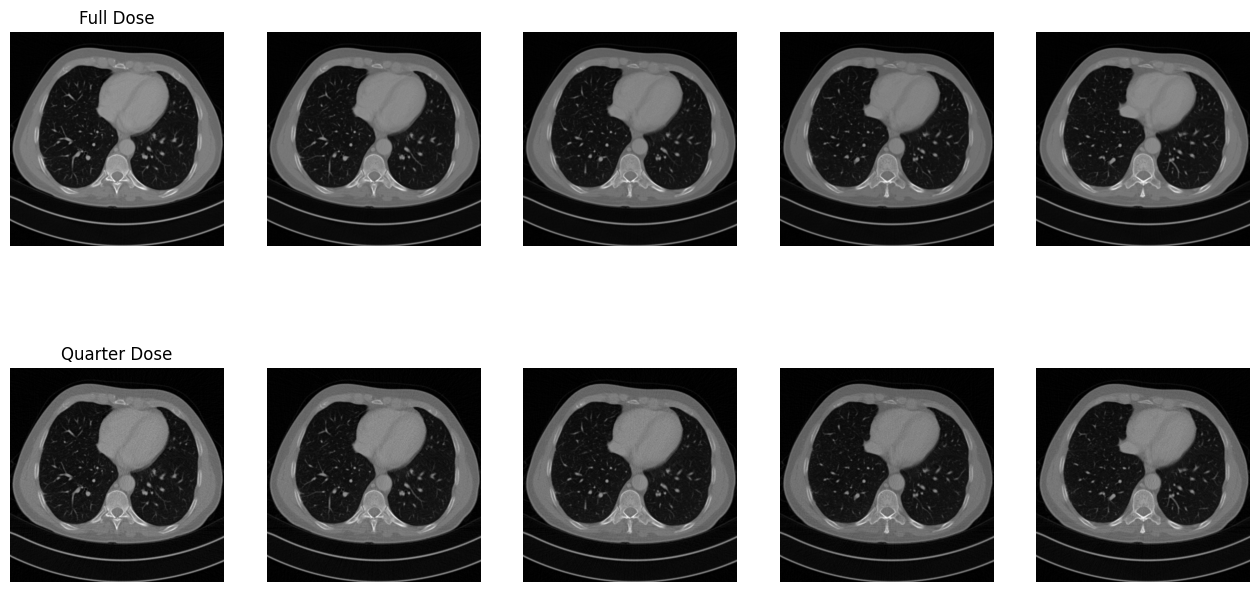

In [15]:
# get the first 5 full dose and quarter dose images
fd_sample_images = fd_images[:5]
qd_sample_images = qd_images[:5]

# create a figure with two rows and five columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))

# iterate over the full dose and quarter dose sample images
for i, (fd_image, qd_image) in enumerate(zip(fd_sample_images, qd_sample_images)):
    # display the images side by side in the corresponding subplot
    axes[0, i].imshow(fd_image, cmap='gray')
    axes[1, i].imshow(qd_image, cmap='gray')

# set the titles for the subplots
axes[0, 0].set_title("Full Dose")
axes[1, 0].set_title("Quarter Dose")

# hide the axis labels
for ax in axes.flatten():
    ax.axis('off')

# display the figure
plt.show()

# Create dataset_division txt files

Rename the files

In [57]:
# Define the path to the directory containing the files to be renamed
dir_path = 'drive/MyDrive/CNCL-Project/Dataset/FD/Images'

# Get the list of file names in the directory
file_names = os.listdir(dir_path)

# Sort the file names alphabetically
file_names.sort()

# Rename the files to numbers starting from 1
for i, file_name in enumerate(file_names):
    file_path = os.path.join(dir_path, file_name)
    new_file_name = f"{i+1}.jpg"  # or use the appropriate file extension
    new_file_path = os.path.join(dir_path, new_file_name)
    os.rename(file_path, new_file_path)

In [58]:
# Define the path to the directory containing the files to be renamed
dir_path = 'drive/MyDrive/CNCL-Project/Dataset/QD/Images'

# Get the list of file names in the directory
file_names = os.listdir(dir_path)

# Sort the file names alphabetically
file_names.sort()

# Rename the files to numbers starting from 1
for i, file_name in enumerate(file_names):
    file_path = os.path.join(dir_path, file_name)
    new_file_name = f"{i+1}.jpg"  # or use the appropriate file extension
    new_file_path = os.path.join(dir_path, new_file_name)
    os.rename(file_path, new_file_path)

Create text files

In [65]:
import os
import random

# Define the paths
fd_path = 'drive/MyDrive/CNCL-Project/Dataset/FD/Images'
qd_path = 'drive/MyDrive/CNCL-Project/Dataset/QD/Images'
dataset_division_path = 'drive/MyDrive/CNCL-Project/Dataset/Dataset_division'

# Create the directories to store the text files
if not os.path.exists(dataset_division_path):
    os.makedirs(dataset_division_path)

# Get the list of file names in the FD folder
fd_files = os.listdir(fd_path)

# Sort the file names numerically
fd_files.sort(key=lambda x: int(os.path.splitext(x)[0]))

# Shuffle the files
random.shuffle(fd_files)

# Split the FD data into train and test sets
train_size = int(0.8 * len(fd_files))
train_fd_files = fd_files[:train_size]
test_fd_files = fd_files[train_size:]

# Create a dictionary to map FD file names to QD file names
fd_to_qd = {}
for fd_file in fd_files:
    fd_to_qd[fd_file] = fd_file.replace('FD', 'QD')

# Get the corresponding QD files
qd_files = [fd_to_qd[file_name] for file_name in fd_files]
train_qd_files = [fd_to_qd[file_name] for file_name in train_fd_files]
test_qd_files = [fd_to_qd[file_name] for file_name in test_fd_files]

# Write the train and test file names to text files
with open(os.path.join(dataset_division_path, 'train_clean.txt'), 'w') as f:
    for file_name in train_fd_files:
        f.write(os.path.splitext(file_name)[0] + '.jpg\n')

with open(os.path.join(dataset_division_path, 'test_clean.txt'), 'w') as f:
    for file_name in test_fd_files:
        f.write(os.path.splitext(file_name)[0] + '.jpg\n')

with open(os.path.join(dataset_division_path, 'train_noisy.txt'), 'w') as f:
    for file_name in train_qd_files:
        f.write(os.path.splitext(file_name)[0] + '.jpg\n')

with open(os.path.join(dataset_division_path, 'test_noisy.txt'), 'w') as f:
    for file_name in test_qd_files:
        f.write(os.path.splitext(file_name)[0] + '.jpg\n')

# Train Data loader

In [6]:
import os
import torch.utils.data as data
from PIL import Image
import numpy as np

# Define the paths
noisy_img_path = 'drive/MyDrive/CNCL-Project/Dataset/QD/Images'
clean_img_path = 'drive/MyDrive/CNCL-Project/Dataset/FD/Images'
train_noisy_txt = 'drive/MyDrive/CNCL-Project/Dataset/Dataset_division/train_noisy.txt'
train_clean_txt = 'drive/MyDrive/CNCL-Project/Dataset/Dataset_division/train_clean.txt'

# Load the file names from the text files
with open(train_noisy_txt, 'r') as f:
    noisy_list = [os.path.join(noisy_img_path, line.strip()) for line in f.readlines()]

with open(train_clean_txt, 'r') as f:
    clean_list = [os.path.join(clean_img_path, line.strip()) for line in f.readlines()]

def get_Training_Set():
    return DatasetFromFolder(noisy_list, clean_list)

def load_image(filepath):
    image = Image.open(filepath)
    image = np.array(image).astype('float32')
    mean = np.mean(image)
    var = np.var(image)
    return np.expand_dims(image, axis=0), mean, var

class DatasetFromFolder(data.Dataset):
    def __init__(self, noisy_list, clean_list):
        super(DatasetFromFolder, self).__init__()
        self.noisy_list = noisy_list
        self.clean_list = clean_list

    def __getitem__(self, index):
        noisy, mean_n, var_n = load_image(self.noisy_list[index])
        clean, mean_c, var_c = load_image(self.clean_list[index])
        noisy = (noisy - mean_n) / var_n
        clean = (clean - mean_n) / var_n
        noise = noisy - clean
        target = np.concatenate((clean, noise), axis=0)
        return {"A": target, "B": noisy, "C": mean_n, "D": var_n}

    def __len__(self):
        return len(self.noisy_list)

# Test Data loader

In [2]:
# Define the paths
noisy_img_path = 'drive/MyDrive/CNCL-Project/Dataset/QD/Images'
clean_img_path = 'drive/MyDrive/CNCL-Project/Dataset/FD/Images'
test_noisy_txt = 'drive/MyDrive/CNCL-Project/Dataset/Dataset_division/test_noisy.txt'
test_clean_txt = 'drive/MyDrive/CNCL-Project/Dataset/Dataset_division/test_clean.txt'

noisy_list = list()
clean_list = list()
for line_noisy in open(test_noisy_txt, "r"):
    line_noisy = line_noisy[:-1]
    path_noisy_image = os.path.join(noisy_img_path, line_noisy)
    noisy_list.append(path_noisy_image)

for line_clean in open(test_clean_txt, "r"):
    line_clean = line_clean[:-1]
    path_clean_image = os.path.join(clean_img_path, line_clean)
    clean_list.append(path_clean_image)


def get_Test_Set():
    return DatasetFromFolder(noisy_list, clean_list)


def load_image(filepath):
    image = Image.open(filepath)
    image = np.array(image).astype('float32')
    mean = np.mean(image)
    var = np.var(image)
    return np.expand_dims(image, axis=0), mean, var


class DatasetFromFolder(data.Dataset):
    def __init__(self, noisy_list, clean_list):
        super(DatasetFromFolder, self).__init__()
        self.noisy_list = noisy_list
        self.clean_list = clean_list

    def __getitem__(self, index):
        noisy, mean_n, var_n = load_image(self.noisy_list[index])
        clean, mean_c, var_c = load_image(self.clean_list[index])
        noisy = (noisy - mean_n) / var_n
        clean = (clean - mean_n) / var_n
        noise = noisy - clean
        target = np.concatenate((clean, noise), axis=0)
        return {"A": target, "B": noisy, "C": mean_n, "D": var_n}

    def __len__(self):
        return len(self.noisy_list)

NameError: ignored

# Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from math import sqrt

def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)

##############################

# generator: CNCL-U-Net

##############################

class GeneratorUNet(nn.Module):
    def __init__(self):
        super(GeneratorUNet, self).__init__()

        # for content learning
        # encoder
        self.conv1_1_01 = nn.Conv2d(1, 64, 3, padding=1)
        self.bn1_1_01 = nn.BatchNorm2d(64)
        self.conv1_2_01 = nn.Conv2d(64, 64, 3, padding=1)
        self.bn1_2_01 = nn.BatchNorm2d(64)

        self.conv2_1_01 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2_1_01 = nn.BatchNorm2d(128)
        self.conv2_2_01 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn2_2_01 = nn.BatchNorm2d(128)

        self.conv3_1_01 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3_1_01 = nn.BatchNorm2d(256)
        self.conv3_2_01 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn3_2_01 = nn.BatchNorm2d(256)

        self.conv4_1_01 = nn.Conv2d(256, 512, 3, padding=1)
        self.bn4_1_01 = nn.BatchNorm2d(512)
        self.conv4_2_01 = nn.Conv2d(512, 512, 3, padding=1)
        self.bn4_2_01 = nn.BatchNorm2d(512)

        self.conv5_1_01 = nn.Conv2d(512, 1024, 3, padding=1)
        self.bn5_1_01 = nn.BatchNorm2d(1024)
        self.conv5_2_01 = nn.Conv2d(1024, 512, 3, padding=1)
        self.bn5_2_01 = nn.BatchNorm2d(512)

        # decoder
        self.upconv4_1_01 = nn.Conv2d(1024, 512, 3, padding=1)
        self.upbn4_1_01 = nn.BatchNorm2d(512)
        self.upconv4_2_01 = nn.Conv2d(512, 256, 3, padding=1)
        self.upbn4_2_01 = nn.BatchNorm2d(256)

        self.upconv3_1_01 = nn.Conv2d(512, 256, 3, padding=1)
        self.upbn3_1_01 = nn.BatchNorm2d(256)
        self.upconv3_2_01 = nn.Conv2d(256, 128, 3, padding=1)
        self.upbn3_2_01 = nn.BatchNorm2d(128)

        self.upconv2_1_01 = nn.Conv2d(256, 128, 3, padding=1)
        self.upbn2_1_01 = nn.BatchNorm2d(128)
        self.upconv2_2_01 = nn.Conv2d(128, 64, 3, padding=1)
        self.upbn2_2_01 = nn.BatchNorm2d(64)

        self.upconv1_1_01 = nn.Conv2d(128, 32, 3, padding=1)
        self.upbn1_1_01 = nn.BatchNorm2d(32)
        self.upconv1_2_01 = nn.Conv2d(32, 1, 3, padding=1)
        self.upbn1_2_01 = nn.BatchNorm2d(64)

        # ************************************************************
        # for noise learning
        # encoder
        self.conv1_1_02 = nn.Conv2d(1, 64, 3, padding=1)
        self.bn1_1_02 = nn.BatchNorm2d(64)
        self.conv1_2_02 = nn.Conv2d(64, 64, 3, padding=1)
        self.bn1_2_02 = nn.BatchNorm2d(64)

        self.conv2_1_02 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2_1_02 = nn.BatchNorm2d(128)
        self.conv2_2_02 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn2_2_02 = nn.BatchNorm2d(128)

        self.conv3_1_02 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3_1_02 = nn.BatchNorm2d(256)
        self.conv3_2_02 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn3_2_02 = nn.BatchNorm2d(256)

        self.conv4_1_02 = nn.Conv2d(256, 512, 3, padding=1)
        self.bn4_1_02 = nn.BatchNorm2d(512)
        self.conv4_2_02 = nn.Conv2d(512, 512, 3, padding=1)
        self.bn4_2_02 = nn.BatchNorm2d(512)

        self.conv5_1_02 = nn.Conv2d(512, 1024, 3, padding=1)
        self.bn5_1_02 = nn.BatchNorm2d(1024)
        self.conv5_2_02 = nn.Conv2d(1024, 512, 3, padding=1)
        self.bn5_2_02 = nn.BatchNorm2d(512)

        # decoder
        self.upconv4_1_02 = nn.Conv2d(1024, 512, 3, padding=1)
        self.upbn4_1_02 = nn.BatchNorm2d(512)
        self.upconv4_2_02 = nn.Conv2d(512, 256, 3, padding=1)
        self.upbn4_2_02 = nn.BatchNorm2d(256)

        self.upconv3_1_02 = nn.Conv2d(512, 256, 3, padding=1)
        self.upbn3_1_02 = nn.BatchNorm2d(256)
        self.upconv3_2_02 = nn.Conv2d(256, 128, 3, padding=1)
        self.upbn3_2_02 = nn.BatchNorm2d(128)

        self.upconv2_1_02 = nn.Conv2d(256, 128, 3, padding=1)
        self.upbn2_1_02 = nn.BatchNorm2d(128)
        self.upconv2_2_02 = nn.Conv2d(128, 64, 3, padding=1)
        self.upbn2_2_02 = nn.BatchNorm2d(64)

        self.upconv1_1_02 = nn.Conv2d(128, 32, 3, padding=1)
        self.upbn1_1_02 = nn.BatchNorm2d(32)
        self.upconv1_2_02 = nn.Conv2d(32, 1, 3, padding=1)
        self.upbn1_2_02 = nn.BatchNorm2d(64)

        # ************************************************************
        self.maxpool = nn.MaxPool2d(2, stride=2, return_indices=False, ceil_mode=False)
        self.upsample = nn.UpsamplingBilinear2d(scale_factor=2)
        # ************************************************************
        # fusion mechanism
        self.final_conv = nn.Conv2d(2, 1, 1)
        # ************************************************************
        self._initialize_weights()

    def forward(self, x0):

        # encoder for content learning
        x1_1_01 = F.relu(self.bn1_1_01(self.conv1_1_01(x0)))
        x1_2_01 = F.relu(self.bn1_2_01(self.conv1_2_01(x1_1_01)))

        x2_0_01 = self.maxpool(x1_2_01)
        x2_1_01 = F.relu(self.bn2_1_01(self.conv2_1_01(x2_0_01)))
        x2_2_01 = F.relu(self.bn2_2_01(self.conv2_2_01(x2_1_01)))

        x3_0_01 = self.maxpool(x2_2_01)
        x3_1_01 = F.relu(self.bn3_1_01(self.conv3_1_01(x3_0_01)))
        x3_2_01 = F.relu(self.bn3_2_01(self.conv3_2_01(x3_1_01)))

        x4_0_01 = self.maxpool(x3_2_01)
        x4_1_01 = F.relu(self.bn4_1_01(self.conv4_1_01(x4_0_01)))
        x4_2_01 = F.relu(self.bn4_2_01(self.conv4_2_01(x4_1_01)))

        x5_0_01 = self.maxpool(x4_2_01)
        x5_1_01 = F.relu(self.bn5_1_01(self.conv5_1_01(x5_0_01)))
        x5_2_01 = F.relu(self.bn5_2_01(self.conv5_2_01(x5_1_01)))

        # decoder for content learning
        upx4_1_01 = self.upsample(x5_2_01)
        upx4_2_01 = F.relu(self.upbn4_1_01(self.upconv4_1_01(torch.cat((upx4_1_01, x4_2_01), 1))))
        upx4_3_01 = F.relu(self.upbn4_2_01(self.upconv4_2_01(upx4_2_01)))

        upx3_1_01 = self.upsample(upx4_3_01)
        upx3_2_01 = F.relu(self.upbn3_1_01(self.upconv3_1_01(torch.cat((upx3_1_01, x3_2_01), 1))))
        upx3_3_01 = F.relu(self.upbn3_2_01(self.upconv3_2_01(upx3_2_01)))

        upx2_1_01 = self.upsample(upx3_3_01)
        upx2_2_01 = F.relu(self.upbn2_1_01(self.upconv2_1_01(torch.cat((upx2_1_01, x2_2_01), 1))))
        upx2_3_01 = F.relu(self.upbn2_2_01(self.upconv2_2_01(upx2_2_01)))

        upx1_1_01 = self.upsample(upx2_3_01)
        upx1_2_01 = self.upconv1_1_01(torch.cat((upx1_1_01, x1_2_01), 1))
        content_1 = self.upconv1_2_01(upx1_2_01)

        # ************************************************************
        # encoder for noise learning
        x1_1_02 = F.relu(self.bn1_1_02(self.conv1_1_02(x0)))
        x1_2_02 = F.relu(self.bn1_2_02(self.conv1_2_02(x1_1_02)))

        x2_0_02 = self.maxpool(x1_2_02)
        x2_1_02 = F.relu(self.bn2_1_02(self.conv2_1_02(x2_0_02)))
        x2_2_02 = F.relu(self.bn2_2_02(self.conv2_2_02(x2_1_02)))

        x3_0_02 = self.maxpool(x2_2_02)
        x3_1_02 = F.relu(self.bn3_1_02(self.conv3_1_02(x3_0_02)))
        x3_2_02 = F.relu(self.bn3_2_02(self.conv3_2_02(x3_1_02)))

        x4_0_02 = self.maxpool(x3_2_02)
        x4_1_02 = F.relu(self.bn4_1_02(self.conv4_1_02(x4_0_02)))
        x4_2_02 = F.relu(self.bn4_2_02(self.conv4_2_02(x4_1_02)))

        x5_0_02 = self.maxpool(x4_2_02)
        x5_1_02 = F.relu(self.bn5_1_02(self.conv5_1_02(x5_0_02)))
        x5_2_02 = F.relu(self.bn5_2_02(self.conv5_2_02(x5_1_02)))

        # decoder for noise learning
        upx4_1_02 = self.upsample(x5_2_02)
        upx4_2_02 = F.relu(self.upbn4_1_02(self.upconv4_1_02(torch.cat((upx4_1_02, x4_2_02), 1))))
        upx4_3_02 = F.relu(self.upbn4_2_02(self.upconv4_2_02(upx4_2_02)))

        upx3_1_02 = self.upsample(upx4_3_02)
        upx3_2_02 = F.relu(self.upbn3_1_02(self.upconv3_1_02(torch.cat((upx3_1_02, x3_2_02), 1))))
        upx3_3_02 = F.relu(self.upbn3_2_02(self.upconv3_2_02(upx3_2_02)))

        upx2_1_02 = self.upsample(upx3_3_02)
        upx2_2_02 = F.relu(self.upbn2_1_02(self.upconv2_1_02(torch.cat((upx2_1_02, x2_2_02), 1))))
        upx2_3_02 = F.relu(self.upbn2_2_02(self.upconv2_2_02(upx2_2_02)))

        upx1_1_02 = self.upsample(upx2_3_02)
        upx1_2_02 = self.upconv1_1_02(torch.cat((upx1_1_02, x1_2_02), 1))
        noise = self.upconv1_2_02(upx1_2_02)

        content_2 = x0 - noise

        # fusion mechanism
        content = self.final_conv(torch.cat((content_1, content_2), 1))

        return torch.cat((content, noise), 1)

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, sqrt(2. / n))
                if m.bias is not None:
                    m.bias.data.zero_()
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

##############################

# Discriminator: PatchGAN

##############################

class Discriminator(nn.Module):
    def __init__(self, in_channels=3):
        super(Discriminator, self).__init__()

        def discriminator_block(in_filters, out_filters, normalization=True):
            layers = [nn.Conv2d(in_filters, out_filters, 4, stride=2, padding=1)]
            if normalization:
                layers.append(nn.InstanceNorm2d(out_filters))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *discriminator_block(in_channels, 64, normalization=False),
            *discriminator_block(64, 128),
            *discriminator_block(128, 256),
            *discriminator_block(256, 512),
            nn.ZeroPad2d((1, 0, 1, 0)),
            nn.Conv2d(512, 1, 4, padding=1, bias=False)
        )

    def forward(self, img_A, img_B):
        img_input = torch.cat((img_A, img_B), 1)
        return self.model(img_input)

# Train

In [9]:
import argparse
import os
import numpy as np
import sys
import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable

In [10]:
# Set hyperparameters
epoch = 0
n_epochs = 300
batch_size = 2
lr = 0.00002
b1 = 0.5
b2 = 0.999
threads = 0
img_height = 512
img_width = 512

In [11]:
cuda = True if torch.cuda.is_available() else False

In [12]:
# Loss functions
criterion_GAN = torch.nn.MSELoss()
criterion_pixelwise = torch.nn.L1Loss()

# Loss weight of L1 pixel-wise loss
lambda_pixel = 100

# Calculate output of image discriminator (PatchGAN)
patch = (1, img_height // 2 ** 4, img_width // 2 ** 4)

generator = GeneratorUNet()
discriminator = Discriminator()

if cuda:
    generator = generator.cuda()
    discriminator = discriminator.cuda()
    criterion_GAN = criterion_GAN.cuda()
    criterion_pixelwise_1 = criterion_pixelwise.cuda()
    torch.cuda.set_device(0) # Use the first GPU on Colab

generator.apply(weights_init_normal)
discriminator.apply(weights_init_normal)

Discriminator(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (9): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): ZeroPad2d((1, 0, 1, 0))
    (12): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
  )
)

In [13]:
# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

print('===> Loading datasets')
dataloader = get_Training_Set()
training_data_loader = DataLoader(dataset=dataloader, num_workers=threads, batch_size=batch_size, shuffle=True)

# Tensor type
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

===> Loading datasets


In [ ]:
def train(epoch):
    epoch_loss_D = 0
    epoch_loss_G = 0
    epoch_loss_Pixel = 0
    epoch_loss_GAN = 0
    for i, batch in enumerate(training_data_loader):
        real_A = Variable(batch["B"])
        real_B = Variable(batch["A"])
        mean_n = Variable(batch["C"])
        var_n = Variable(batch["D"])
        if cuda:
            real_A = real_A.cuda()
            real_B = real_B.cuda()

        valid = torch.tensor(np.ones((real_A.size(0), *patch)), requires_grad=False).float().cuda()
        fake = torch.tensor(np.zeros((real_A.size(0), *patch)), requires_grad=False).float().cuda()
        # ------------------
        #  Train Generators
        # ------------------
        optimizer_G.zero_grad()
        # GAN loss
        print(real_A.shape)
        fake_B = generator(real_A)

        # pred_fake = discriminator(fake_B, real_A)
        # pred_fake = pred_fake.float()

        # print(pred_fake.shape)
        # print(valid.shape)
        # loss_GAN = criterion_GAN(pred_fake, valid)

        pred_fake = discriminator(fake_B, real_A)
        pred_fake = pred_fake.float()

        valid_resized = valid.expand_as(pred_fake)
        # GAN loss
        loss_GAN = criterion_GAN(pred_fake, valid_resized)

        # Calculate two losses simultaneously : one between real content and predicted content, and the other between real noise and predicted noise, and their weights are equal
        loss_pixel = criterion_pixelwise(fake_B, real_B)
        # Total loss
        loss_G = loss_GAN + lambda_pixel * loss_pixel
        loss_G.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()
        # Real loss
        pred_real = discriminator(real_B, real_A)
        loss_real = criterion_GAN(pred_real, valid)
        # Fake loss
        pred_fake = discriminator(fake_B.detach(), real_A)
        loss_fake = criterion_GAN(pred_fake, fake)
        # Total loss
        loss_D = 0.5 * (loss_real + loss_fake)
        loss_D.backward()
        optimizer_D.step()

        epoch_loss_D += loss_D.item()
        epoch_loss_G += loss_G.item()
        epoch_loss_Pixel += loss_pixel.item()
        epoch_loss_GAN += loss_GAN.item()

        sys.stdout.write(
            "\r[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f, pixel: %f, adv: %f] "
            % (
                epoch,
                n_epochs,
                i,
                len(dataloader),
                loss_D.item(),
                loss_G.item(),
                loss_pixel.item(),
                loss_GAN.item(),
            )
        )

    if int(epoch) > 150:
        torch.save(generator.state_dict(), r"../result/saved_models/generator_%d.pth" % epoch)

for epoch in range(epoch, n_epochs):
    train(epoch)

# Save model checkpoints
torch.save(generator.state_dict(), r"../result/saved_models/generator_%d.pth" % epoch)
torch.save(discriminator.state_dict(), r"../result/saved_models/discriminator_%d.pth" % epoch)

# Test

In [14]:
from __future__ import print_function
import argparse
import numpy as np
import os
from torch.utils.data import DataLoader
from torch.autograd import Variable
from skimage import io
import torch

In [15]:
cuda = True if torch.cuda.is_available() else False

generator = GeneratorUNet()

if cuda:
    generator = generator.cuda()

print('===> Loading datasets')

val_dataloader = get_Test_Set()
validation_data_loader = DataLoader(dataset=val_dataloader, num_workers=0, batch_size=1, shuffle=False)

# Tensor type
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

===> Loading datasets


In [16]:
def test(epoch=299, batch_size=1, threads=0):
    generator.load_state_dict(torch.load(r"drive/MyDrive/CNCL-Project/Model/generator_%d.pth" % epoch, map_location=torch.device('cpu')))

    print(generator.get_parameter)
    validation_data_loader = DataLoader(dataset=val_dataloader, num_workers=threads, batch_size=batch_size, shuffle=False)

    index = 0
    for i, batch in enumerate(validation_data_loader):
        index = index + 1
        real_A = Variable(batch["B"])
        real_B = Variable(batch["A"])
        mean_n = Variable(batch["C"])
        var_n = Variable(batch["D"])
        if cuda:
            real_A = real_A.cuda()
            real_B = real_B.cuda()
        with torch.no_grad():
            fake_B = generator(real_A)
            imgout_test = (fake_B[0][0]).detach().cpu().numpy()

        mean_n = mean_n.detach().cpu().numpy()[0]
        var_n = var_n.detach().cpu().numpy()[0]

        imgout_test = imgout_test * var_n + mean_n
        root_result_test = r"drive/MyDrive/CNCL-Project/Result/"
        filename_result_test = str(index) + '_test.png'
        filename_abs_root_test = os.path.join(root_result_test, filename_result_test)
        io.imsave(filename_abs_root_test, imgout_test)

test(epoch=299, batch_size=1, threads=0)

<bound method Module.get_parameter of GeneratorUNet(
  (conv1_1_01): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1_1_01): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1_2_01): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1_2_01): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_1_01): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2_1_01): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_2_01): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2_2_01): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3_1_01): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3_1_01): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3_2_01): Conv2d(256, 256, kernel_size=(3, 3), stride=

# Results

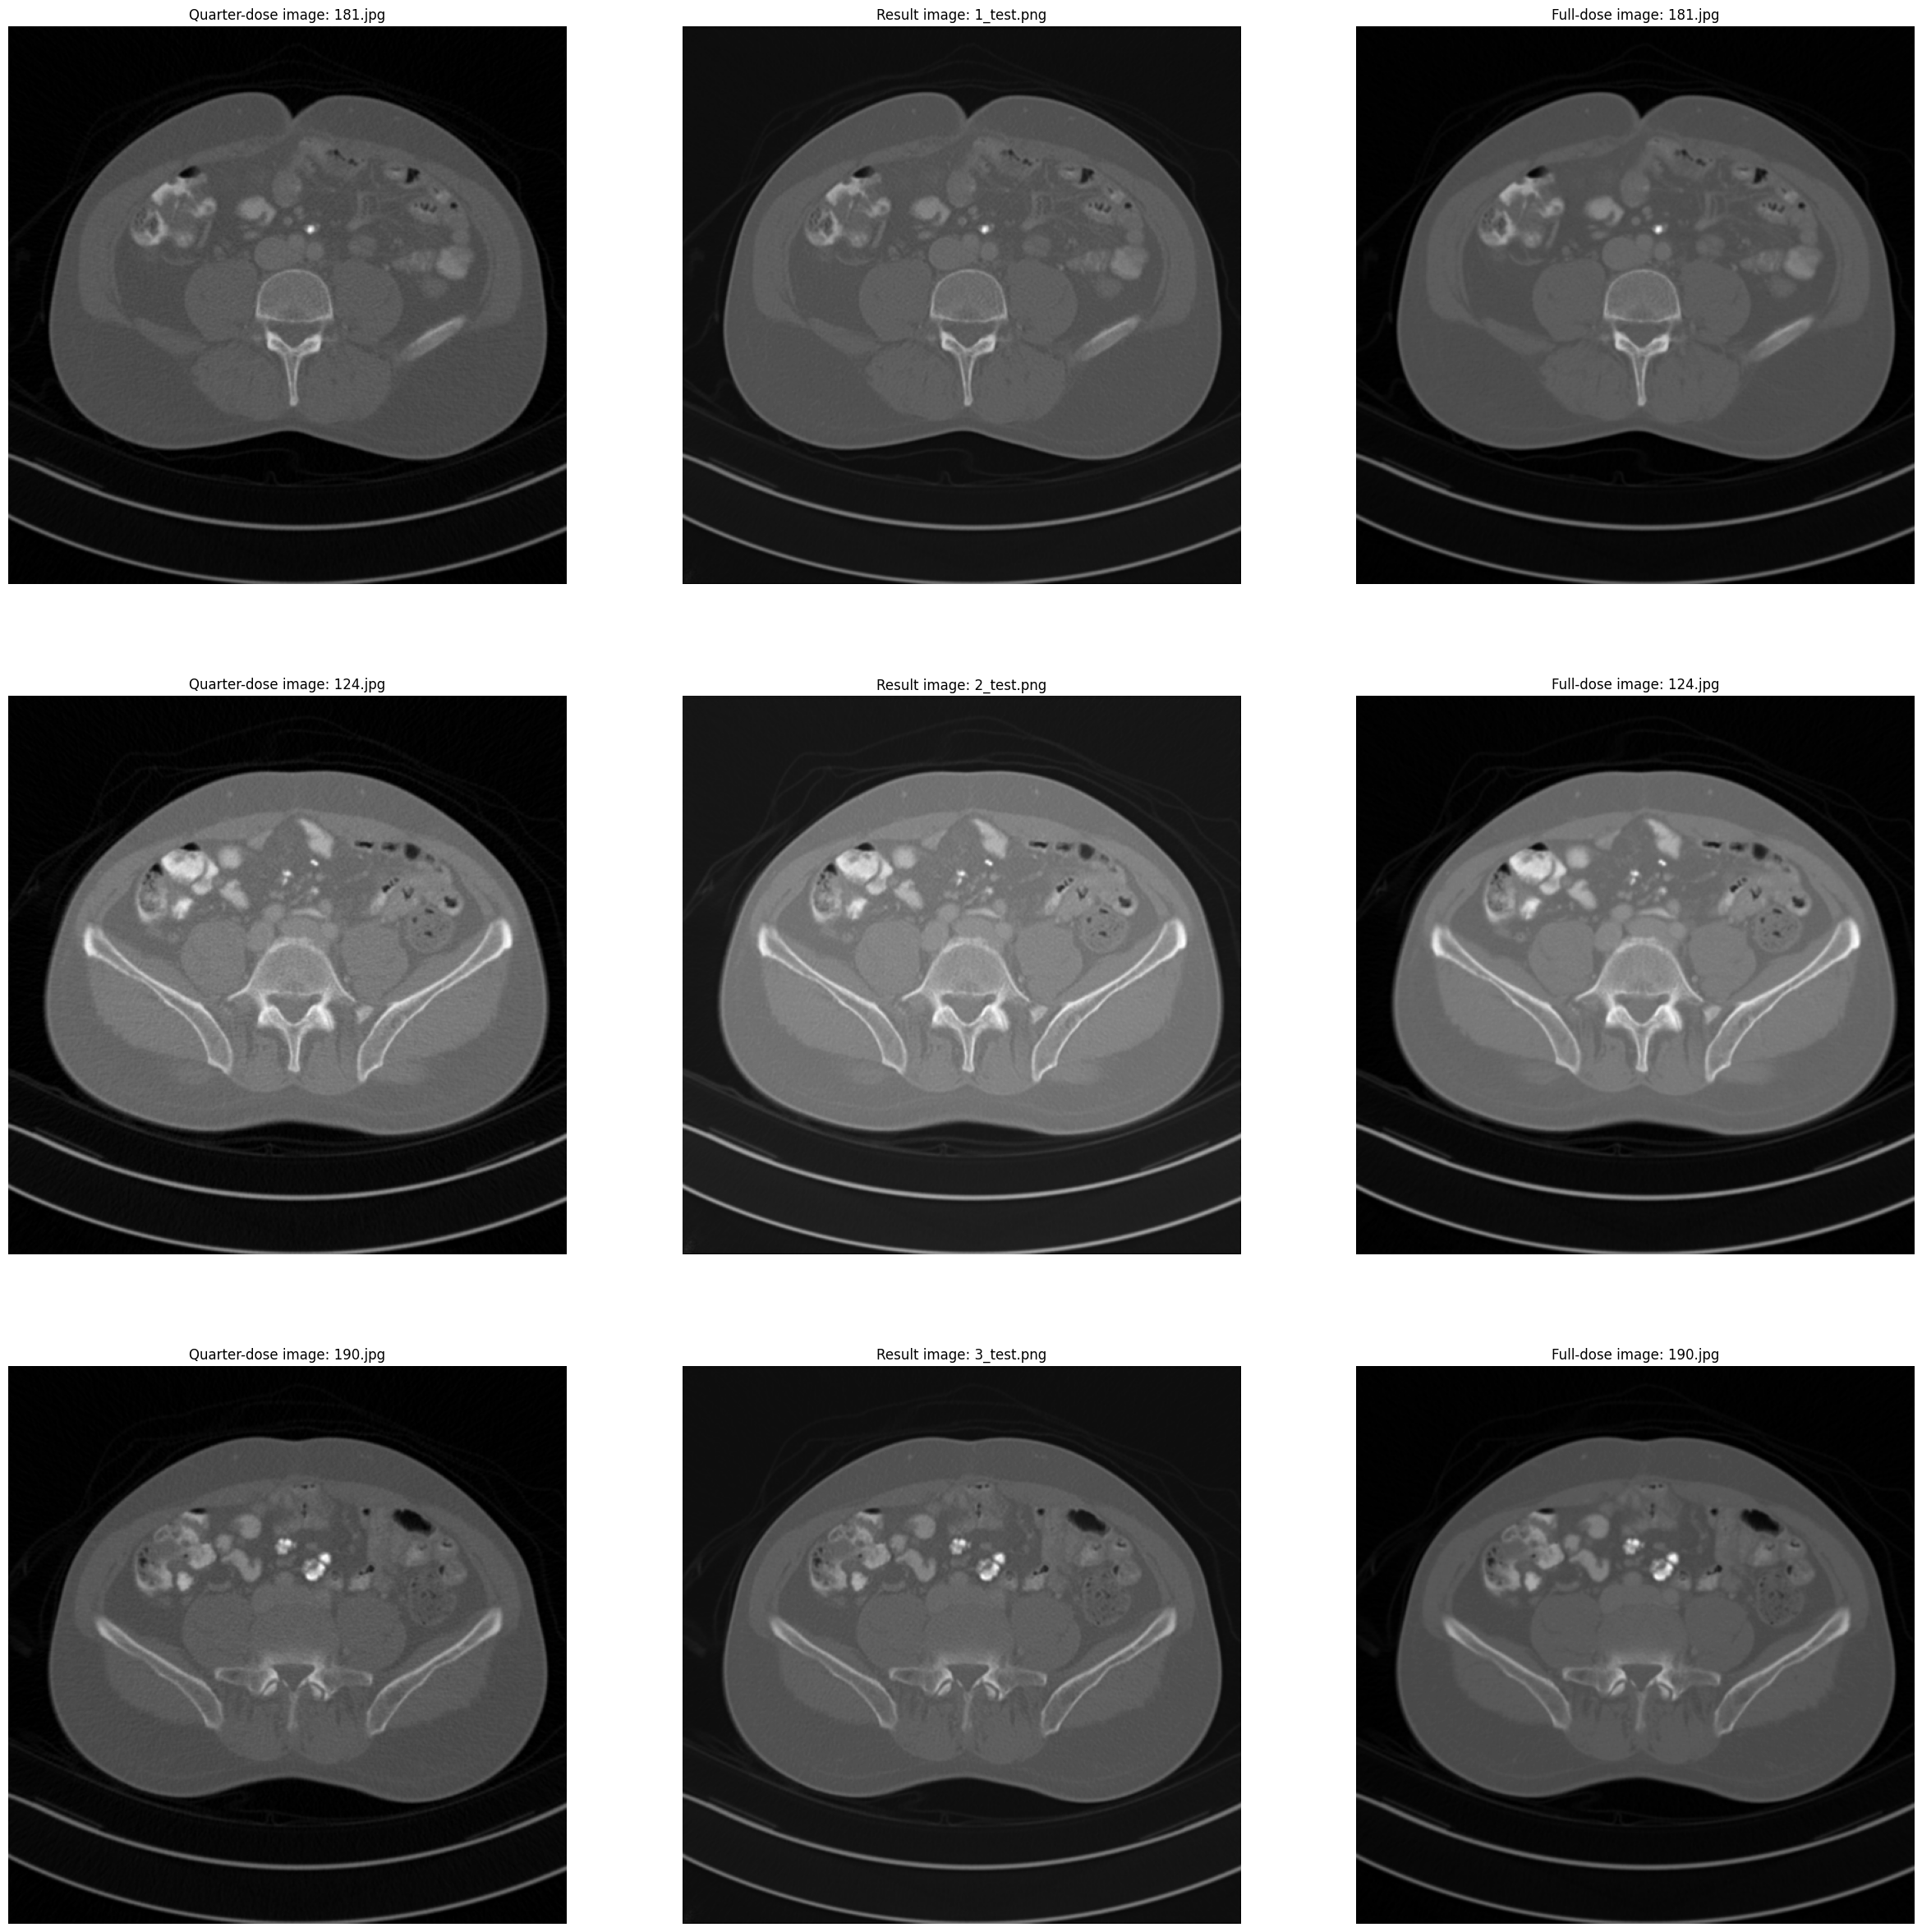

In [27]:
import os
import matplotlib.pyplot as plt

result_images = []
qd_images = []
fd_images = []

# Define the paths
results_path = 'drive/MyDrive/CNCL-Project/Result'
test_noisy_path = 'drive/MyDrive/CNCL-Project/Dataset/Dataset_division/test_noisy.txt'
qd_path = 'drive/MyDrive/CNCL-Project/Dataset/QD/Images'
test_clean_path = 'drive/MyDrive/CNCL-Project/Dataset/Dataset_division/test_clean.txt'
fd_path = 'drive/MyDrive/CNCL-Project/Dataset/FD/Images'

# Get the file names in the results folder
file_names = os.listdir(results_path)

# Read the file names from the test_noisy file
with open(test_noisy_path, 'r') as f:
    qd_file_names = f.read().splitlines()

# Read the file names from the test_clean file
with open(test_clean_path, 'r') as f:
    fd_file_names = f.read().splitlines()

# Create a figure with subplots for the images
fig, axs = plt.subplots(3, 3, figsize=(30, 30))

for i in range(len(qd_file_names)):
    qd_file_path = os.path.join(qd_path, qd_file_names[i])
    qd_image = plt.imread(qd_file_path)
    qd_images.append(qd_image)

    result_file_path = os.path.join(results_path, file_names[i])
    result_image = plt.imread(result_file_path)
    result_images.append(result_image)

    fd_file_path = os.path.join(fd_path, fd_file_names[i])
    fd_image = plt.imread(fd_file_path)
    fd_images.append(fd_image)


# Load and display the first 3 quarter-dose images and their corresponding results and full-dose images
for i in range(3):
    qd_file_path = os.path.join(qd_path, qd_file_names[i])
    qd_image = plt.imread(qd_file_path)
    # qd_images.append(qd_image)

    result_file_path = os.path.join(results_path, file_names[i])
    result_image = plt.imread(result_file_path)
    # result_images.append(result_image)


    fd_file_path = os.path.join(fd_path, fd_file_names[i])
    fd_image = plt.imread(fd_file_path)
    # fd_images.append(fd_image)


    # Display the quarter-dose image
    axs[i, 0].imshow(qd_image, cmap="gray")
    axs[i, 0].set_title('Quarter-dose image: ' + qd_file_names[i])
    axs[i, 0].axis('off')

    # Display the result image
    axs[i, 1].imshow(result_image, cmap="gray")
    axs[i, 1].set_title('Result image: ' + file_names[i])
    axs[i, 1].axis('off')

    # Display the full-dose image
    axs[i, 2].imshow(fd_image, cmap="gray")
    axs[i, 2].set_title('Full-dose image: ' + fd_file_names[i])
    axs[i, 2].axis('off')

plt.show()

In [28]:
result_images = np.asarray(result_images)
result_images.shape

(26, 512, 512)

In [29]:
qd_images = np.asarray(qd_images)
qd_images.shape

(26, 512, 512)

In [30]:
fd_images = np.asarray(fd_images)
fd_images.shape

(26, 512, 512)

In [33]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def normalize_image(image):
    # Convert the image to float32
    image = image.astype(np.float32)

    # Normalize the image to have zero mean and unit variance
    image_mean = np.mean(image)
    image_std = np.std(image)
    normalized_image = (image - image_mean) / image_std

    return normalized_image

def calculate_metrics(fd_images, qd_images, result_images):
    qd_psnr_list = []
    qd_ssim_list = []
    result_psnr_list = []
    result_ssim_list = []

    for i in range(len(fd_images)):
        # Normalize the images
        fd_image = normalize_image(fd_images[i])
        qd_image = normalize_image(qd_images[i])
        result_image = normalize_image(result_images[i])

        # Calculate PSNR and SSIM metrics for quarter dose image
        qd_psnr = psnr(fd_image, qd_image, data_range=qd_image.max() - qd_image.min())
        qd_ssim = ssim(qd_image, fd_image, data_range=qd_image.max() - qd_image.min())
        qd_psnr_list.append(qd_psnr)
        qd_ssim_list.append(qd_ssim)

        # Calculate PSNR and SSIM metrics for result image
        result_psnr = psnr(fd_image, result_image, data_range=result_image.max() - result_image.min())
        result_ssim = ssim(result_image, fd_image, data_range=result_image.max() - result_image.min())
        result_psnr_list.append(result_psnr)
        result_ssim_list.append(result_ssim)

    # Create a pandas dataframe to store the results
    metrics_df = pd.DataFrame({
        'qd_psnr': qd_psnr_list,
        'qd_ssim': qd_ssim_list,
        'result_psnr': result_psnr_list,
        'result_ssim': result_ssim_list
    })

    return metrics_df

In [34]:
metrics_df = calculate_metrics(fd_images, qd_images, result_images)
display(metrics_df)

,qd_psnr,qd_ssim,result_psnr,result_ssim
0,43.327229,0.964082,46.928811,0.972099
1,41.128008,0.951828,44.588574,0.964937
2,43.033118,0.964461,46.501153,0.971511
3,40.963600,0.948907,45.136763,0.965755
4,39.886987,0.931306,44.551785,0.954552
5,40.010124,0.938223,44.541033,0.958694
6,39.645513,0.930075,44.646183,0.955094
7,40.944935,0.945184,45.216874,0.963589
8,40.608149,0.945105,44.967541,0.962531
9,42.561447,0.962361,46.053015,0.971348
